# Tabular fastai model for idtrees

In [ ]:
import os
from fastai.tabular import *
import matplotlib
from google.colab import drive
import sklearn.metrics

## Environment setup

Ensure fastai up to date, and mount Google Drive.

In [ ]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'
100  8949    0  8949    0     0  59660      0 --:--:-- --:--:-- --:--:-- 59264
curl: (23) Failed writing body (603 != 1360)


In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
np.random.seed(1234)

## Load and merge data

In [ ]:
# Note: to get this IDTReeS_2020 shared folder to show up in your own drive, 
# you'll need to click "Add to Drive" in the Google Drive web browser interface
# https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
data_path = Path("/content/gdrive/My Drive/IDTReeS_2020/data")



In [ ]:
def make_train():
    hyperspectral = pd.read_csv(data_path/"hyperspectral_train.csv")
    pseudowaveform = pd.read_csv(data_path/"idtrees_pwave_indvdID.csv")
    rgb_preds = pd.read_csv(Path("/content/gdrive/My Drive/IDTReeS_2020/output/rgb_predicted_species.csv"))  

    d = pd.merge(pseudowaveform, hyperspectral)
    d = pd.merge(d, rgb_preds.rename(columns = {"indvdlID": "indvdID"}))

    # drop columns that are not predictors or targets (otherwise, these are used as features by fastai)
    d = d.drop(columns = ["indvdID", 'Unnamed: 0'])
    return d

In [ ]:
d = make_train()
print(d.shape)
d.head()

(1051, 442)


,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,bin_11,bin_12,bin_13,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23,bin_24,bin_25,bin_26,bin_27,bin_28,bin_29,bin_30,bin_31,bin_32,bin_33,bin_34,bin_35,bin_36,bin_37,bin_38,bin_39,numpts,...,band_362,band_363,band_364,band_365,band_366,band_367,band_368,band_369,set,ACPE,ACRU,ACSA3,AMLA,BETUL,CAGL8,CATO6,FAGR,GOLA,LITU,LYLU3,MAGNO,NYBI,NYSY,OXYDE,PIEL,PINUS,PIPA2,PITA,PRSE2,QUAL,QUCO2,QUERC,QUGE2,QUHE2,QULA2,QULA3,QUMO4,QURU,ROPS,TSCA
0,0.142857,0.000000,0.000000,0.011905,0.000000,0.059524,0.095238,0.178571,0.023810,0.000000,0.011905,0.011905,0.011905,0.261905,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84,...,1182.0,1026.5,1160.5,1168.5,1051.5,1095.5,1032.0,1021.0,train,-0.042726,-2.755355,-0.796217,0.299061,-1.367999,1.790167,1.880192,-0.173828,-2.903280,-3.958924,1.586338,-0.608402,-1.185961,-1.898411,0.320758,0.786689,-2.481247,3.956409,-0.559234,-0.247877,0.949044,1.853604,-0.811770,13.036323,-0.269112,-0.299985,-0.482727,-2.053799,-1.770128,1.073275,0.132713
1,0.003688,0.001229,0.028888,0.047941,0.055931,0.062692,0.020283,0.006761,0.010449,0.012293,0.026429,0.026429,0.040565,0.025200,0.065765,0.151199,0.135218,0.174554,0.086663,0.017824,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1627,...,295.0,304.0,320.0,286.0,264.0,282.0,289.0,297.0,train,5.689729,2.027727,3.197134,-2.066518,-2.059675,0.811904,-0.085849,-1.423916,-1.880170,2.911601,0.352854,0.418511,0.675595,-1.598757,0.643813,4.560400,0.609672,-0.977622,0.805895,-4.123182,2.186124,0.838074,-0.258950,-2.655277,-0.599895,-7.693336,0.718049,2.507006,2.094328,7.164506,-1.584961
2,0.004535,0.015873,0.004535,0.015873,0.024943,0.006803,0.002268,0.004535,0.013605,0.013605,0.022676,0.031746,0.036281,0.138322,0.068027,0.106576,0.181406,0.274376,0.034014,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,441,...,263.5,279.0,321.5,265.0,250.0,260.5,288.5,283.0,eval,0.382718,11.709912,0.184442,1.493129,-0.688290,-1.053842,-1.508129,2.216542,-1.757983,-0.503417,-1.906576,3.676179,-2.730426,-0.676725,-1.946314,0.475941,-0.769619,-10.519946,-1.625474,0.222546,-0.351821,1.204572,-1.612378,-2.080691,0.222295,-2.979961,-1.766999,3.691683,0.575075,1.903854,-1.981869
3,0.097561,0.000000,0.000000,0.008130,0.024390,0.040650,0.105691,0.203252,0.040650,0.130081,0.138211,0.211382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123,...,589.5,491.5,553.0,579.0,516.5,530.5,527.5,517.0,train,5.127346,-2.186074,2.144083,-0.356865,0.194386,0.409922,-1.858123,0.584867,-0.383592,-2.847959,-0.244819,-0.163826,0.781338,-2.209704,-3.668441,0.288121,-1.199022,-2.114465,-0.098927,-0.515400,-3.123448,2.210195,-0.702776,0.103821,1.404539,4.556871,-1.235195,0.217011,1.515711,-0.129611,-1.325016
4,0.002227,0.002227,0.004454,0.011136,0.011136,0.004454,0.002227,0.000000,0.033408,0.008909,0.060134,0.026726,0.060134,0.044543,0.040089,0.042316,0.111359,0.084633,0.173719,0.240535,0.035635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449,...,255.0,261.0,286.0,245.0,247.0,233.0,257.0,251.0,eval,-4.890063,11.480748,0.742873,3.827104,-1.879112,0.016344,-2.924902,1.317883,-0.354241,8.053101,-2.896151,0.870020,-2.760566,-2.217145,-3.226955,-1.876687,0.216331,-14.266448,-0.820914,3.049719,4.192163,6.645062,-2.492005,-4.619846,-0.871665,-3.532347,-2.997227,3.268424,-1.759131,1.602597,-2.212679


In [ ]:
list(d)

['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'bin_6',
 'bin_7',
 'bin_8',
 'bin_9',
 'bin_10',
 'bin_11',
 'bin_12',
 'bin_13',
 'bin_14',
 'bin_15',
 'bin_16',
 'bin_17',
 'bin_18',
 'bin_19',
 'bin_20',
 'bin_21',
 'bin_22',
 'bin_23',
 'bin_24',
 'bin_25',
 'bin_26',
 'bin_27',
 'bin_28',
 'bin_29',
 'bin_30',
 'bin_31',
 'bin_32',
 'bin_33',
 'bin_34',
 'bin_35',
 'bin_36',
 'bin_37',
 'bin_38',
 'bin_39',
 'numpts',
 'taxonID',
 'band_1',
 'band_2',
 'band_3',
 'band_4',
 'band_5',
 'band_6',
 'band_7',
 'band_8',
 'band_9',
 'band_10',
 'band_11',
 'band_12',
 'band_13',
 'band_14',
 'band_15',
 'band_16',
 'band_17',
 'band_18',
 'band_19',
 'band_20',
 'band_21',
 'band_22',
 'band_23',
 'band_24',
 'band_25',
 'band_26',
 'band_27',
 'band_28',
 'band_29',
 'band_30',
 'band_31',
 'band_32',
 'band_33',
 'band_34',
 'band_35',
 'band_36',
 'band_37',
 'band_38',
 'band_39',
 'band_40',
 'band_41',
 'band_42',
 'band_43',
 'band_44',
 'band_45',
 'band_46',
 'band_47',
 '

Designate a validation set.

In [ ]:
valid_idx = np.where(d["set"] == "eval")

In [ ]:
def make_test():
    hyperspectral = pd.read_csv(data_path/"hyperspectral_test.csv")
    pseudowaveform = pd.read_csv(data_path/"idtrees_pwave_idvdID_test_v2.csv")
    rgb_preds = pd.read_csv(Path("/content/gdrive/My Drive/IDTReeS_2020/output/rgb_predicted_species_TEST-IMGS.csv"))  

    d = pd.merge(pseudowaveform, hyperspectral)
    d = pd.merge(d, rgb_preds.rename(columns = {"indvdlID": "indvdID"}))

    # drop columns that are not predictors or targets (otherwise, these are used as features by fastai)
    d = d.drop(columns = ['Unnamed: 0'])
    return d.drop_duplicates()

In [ ]:
d_test = make_test()
print(d_test.shape)
d_test.head()

(585, 443)


,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,bin_11,bin_12,bin_13,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23,bin_24,bin_25,bin_26,bin_27,bin_28,bin_29,bin_30,bin_31,bin_32,bin_33,bin_34,bin_35,bin_36,bin_37,bin_38,bin_39,bin_40,...,band_362,band_363,band_364,band_365,band_366,band_367,band_368,band_369,set,ACPE,ACRU,ACSA3,AMLA,BETUL,CAGL8,CATO6,FAGR,GOLA,LITU,LYLU3,MAGNO,NYBI,NYSY,OXYDE,PIEL,PINUS,PIPA2,PITA,PRSE2,QUAL,QUCO2,QUERC,QUGE2,QUHE2,QULA2,QULA3,QUMO4,QURU,ROPS,TSCA
0,0.018927,0.001052,0.004206,0.016824,0.028391,0.013670,0.005258,0.000000,0.010515,0.002103,0.003155,0.013670,0.011567,0.039958,0.019979,0.024185,0.055731,0.059937,0.106204,0.111462,0.111462,0.101998,0.135647,0.104101,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,265.0,264.0,274.5,249.5,238.5,242.5,255.5,249.5,test,0.592090,-0.416132,-0.690046,2.488604,-3.866256,0.699331,-1.316434,-1.589615,1.562825,4.591947,1.454238,2.151585,-0.948424,0.424763,0.170917,0.557900,-0.426629,-4.442965,0.613826,-0.299808,4.232431,4.396893,-2.709686,1.790344,-0.507132,-3.325403,1.418328,2.837390,-2.425187,3.034161,-0.779299
3,0.009416,0.022599,0.045198,0.018832,0.005650,0.005650,0.035782,0.022599,0.000000,0.000000,0.003766,0.000000,0.000000,0.011299,0.005650,0.026365,0.047081,0.035782,0.054614,0.052731,0.160075,0.152542,0.284369,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,297.0,299.0,311.0,281.0,254.0,272.0,291.0,269.0,test,4.437511,3.935742,1.037367,-0.015194,-2.562770,-1.391342,-1.214311,2.136039,-1.474704,-1.076184,-3.724957,1.000225,-2.368801,-5.058098,-4.357229,-1.963973,-1.595741,-4.607633,-0.861224,0.026927,-4.586204,13.009936,-1.351702,-1.637704,1.207791,2.288897,-0.195201,0.229075,1.217730,-3.068864,-1.338090
6,0.009315,0.006653,0.001331,0.000665,0.003327,0.017964,0.037259,0.023952,0.015303,0.019960,0.001996,0.003327,0.007984,0.005988,0.009980,0.015303,0.012641,0.019960,0.068530,0.085828,0.096474,0.095808,0.123752,0.141717,0.125749,0.049235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,248.5,238.0,254.5,223.0,221.5,218.5,239.0,222.5,test,1.575900,9.031487,0.025427,0.134047,-2.873426,-1.356285,-0.413746,1.319344,-1.741999,0.776960,0.453952,-1.358942,0.091801,3.293955,-2.619407,4.774634,0.675261,-10.176316,2.373282,-0.403316,4.722000,2.426219,-0.702322,-2.379012,0.230203,-3.573595,-0.794714,2.037992,-1.779580,1.299867,-1.780794
9,0.016997,0.016997,0.016997,0.032578,0.053824,0.043909,0.004249,0.005666,0.005666,0.004249,0.001416,0.004249,0.011331,0.012748,0.025496,0.025496,0.050992,0.084986,0.089235,0.077904,0.160057,0.211048,0.043909,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.5,265.5,266.5,240.5,226.0,242.5,238.0,241.5,test,1.272704,7.851862,-0.355169,4.121082,-0.163962,-1.220019,-2.259479,1.802785,-0.891294,2.884550,-1.917581,4.466657,-2.492348,2.575434,0.924104,-3.130187,-0.698794,-18.004583,-0.507260,-0.066539,-0.496729,-0.446631,-2.368081,-3.483212,-1.046471,-4.444576,-3.387680,7.149831,4.906634,2.448580,-1.890218
12,0.038618,0.000000,0.000000,0.000000,0.000000,0.000000,0.006098,0.018293,0.006098,0.004065,0.048780,0.052846,0.008130,0.010163,0.030488,0.077236,0.050813,0.097561,0.174797,0.213415,0.162602,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,190.5,197.0,203.5,175.5,181.5,171.0,197.0,193.0,test,2.041210,9.578220,-1.732177,1.112807,-0.425357,-0.499682,-1.721788,1.566962,-2.031928,-0.196384,-1.847670,2.041028,-0.799772,1.346928,-2.691099,-0.723875,-0.935297,-9.424859,-0.597049,0.023012,-1.838727,-2.619034,-2.165356,-2.989638,2.472450,2.050307,-4.233067,2.216379,4.863880,1.944796,-1.539910


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def one_hot_embedding(labels, num_classes):
  """Embedding labels to one-hot form.

  Args:
    labels: (LongTensor) class labels, sized [N,].
    num_classes: (int) number of classes.

  Returns:
    (tensor) encoded labels, sized [N, #classes].
  """
  y = to_device(torch.eye(num_classes), device) 
  return y[labels] 

In [ ]:
class SoftF1Loss(nn.Module):
  """ Fancy lossy boi - differentiable macro F1 score
  adapted from https://www.kaggle.com/backaggle/imet-fastai-starter-focal-and-fbeta-loss
  and https://towardsdatascience.com/the-unknown-benefits-of-using-a-soft-f1-loss-in-classification-systems-753902c0105d
  """
  def __init__(self):
    super().__init__()
    self.eps = 1e-7

  def forward(self, logits, labels, reduction='mean'):
    probs = F.softmax(logits, dim = -1)
    labels = one_hot_embedding(labels, num_classes = probs.shape[-1])
    # all sums are over examples (to return a result for each class)
    tp = torch.sum(probs * labels, dim=0)
    fp = torch.sum(probs * (1 - labels), dim=0)
    fn = torch.sum((1 - probs) * labels, dim=0)
    soft_f1 = 2 * tp / (2 * tp + fn + fp + self.eps)
    classwise_loss = 1 - soft_f1
    if reduction == 'mean':
      return torch.mean(classwise_loss)
    if reduction == 'sum':
      return torch.sum(classwise_loss)
    else:
      return classwise_loss

## Create a DataBunch and train a model

In [ ]:
d_test["indvdID"]

0       MLBSE00001
3       MLBSE00002
6       MLBSE00003
9       MLBSE00004
12      MLBSE00005
           ...    
1040    TALLE00309
1041    TALLE00310
1042    TALLE00311
1043    TALLE00312
1044    TALLE00314
Name: indvdID, Length: 585, dtype: object

In [ ]:
data = TabularDataBunch.from_df(path=".", 
                                df=d.drop(columns = ['set']), 
                                dep_var="taxonID", 
                                valid_idx=valid_idx, 
                                test_df = d_test.drop(columns = ['indvdID']))

In [ ]:
learn = tabular_learner(data, layers=[64, 32],
                        loss_func=partial(SoftF1Loss()),
                        metrics=[FBeta(beta=1, average='macro'), 
                                 accuracy])

In [ ]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (845 items)
x: TabularList
band_307 1772.0000; band_231 3120.5000; band_190 4147.5000; band_348 1334.0000; band_248 3014.5000; band_236 3162.5000; band_110 3319.0000; bin_36 0.0000; band_212 2661.0000; bin_20 0.0000; OXYDE 0.3208; bin_30 0.0000; band_211 2607.5000; bin_17 0.0000; band_159 4022.0000; band_351 1313.5000; band_194 2168.5000; band_265 2725.0000; band_321 1811.5000; band_103 3287.0000; band_27 558.0000; band_218 2822.0000; bin_6 0.0595; band_320 1839.5000; band_271 1733.5000; band_266 1582.0000; bin_9 0.0238; bin_26 0.0000; band_224 2922.0000; band_200 2052.0000; band_181 4517.5000; band_230 3066.5000; band_124 3773.0000; band_215 2795.5000; bin_10 0.0000; bin_29 0.0000; bin_23 0.0000; band_174 4337.0000; PIPA2 3.9564; ACPE -0.0427; band_359 1242.5000; band_299 1708.5000; band_363 1026.5000; band_132 3999.0000; band_189 4406.5000; band_272 1749.0000; band_244 3095.0000; band_290 1717.5000; band_309 1795.0000; band_235 3210.50

In [ ]:
learn.fit_one_cycle(20, 1e-2)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.977503,0.979895,0.030378,0.179612,00:00
1,0.967343,0.966827,0.064333,0.334951,00:00
2,0.951603,0.938520,0.072895,0.378641,00:00
3,0.931942,0.925693,0.090509,0.461165,00:00
4,0.914469,0.904448,0.133758,0.446602,00:00
5,0.898925,0.910632,0.111661,0.378641,00:00
6,0.884475,0.902094,0.124318,0.364078,00:00
7,0.872222,0.891745,0.169271,0.432039,00:00
8,0.859586,0.896975,0.145885,0.393204,00:00
9,0.845699,0.878493,0.165653,0.466019,00:00


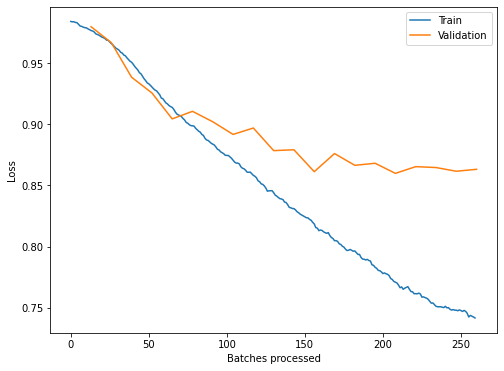

In [ ]:
learn.recorder.plot_losses()

## Evaluate 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

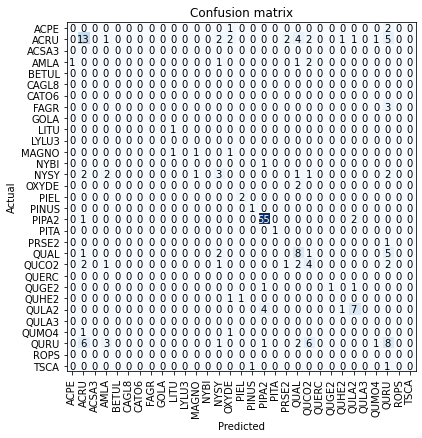

In [ ]:
cm = interp.plot_confusion_matrix()

Save out the confusoin matrix for our validation set.

In [ ]:
pd.DataFrame(data = interp.confusion_matrix(), 
             index = data.c2i.keys(), 
             columns = [f"pred_{key}" for key in data.c2i.keys()]).to_csv("/content/gdrive/My Drive/IDTReeS_2020/output/predictions/eval-confusion.csv")

In [ ]:
# Predict

In [ ]:
test_preds = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
test_probs = torch.softmax(test_preds[0], axis=-1)

In [ ]:
test_probs.shape

torch.Size([585, 31])

Text(0, 0.5, 'Predicted taxon ID')

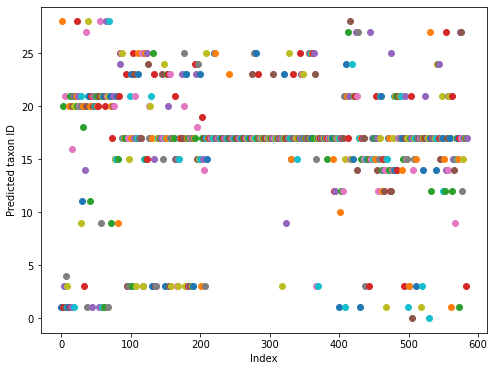

In [ ]:
max_probs = []
for i in range(test_probs.shape[0]):
  max_probs.append(to_np(torch.max(test_probs[i, ])))
  plt.scatter(i, to_np(torch.argmax(test_probs[i, ])))
plt.xlabel('Index')
plt.ylabel('Predicted taxon ID')

Text(0, 0.5, 'Max. probability')

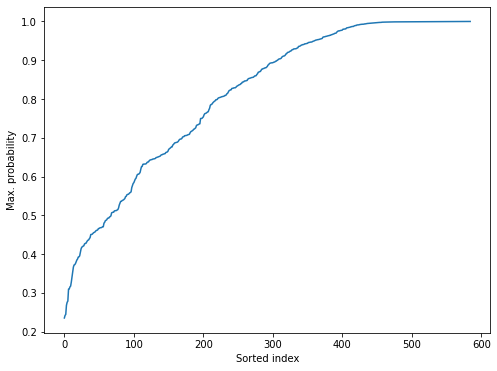

In [ ]:
plt.plot(sorted(max_probs))
plt.xlabel('Sorted index')
plt.ylabel('Max. probability')

In [ ]:
def other_or_not(arr, thresh=0.5):
  
  # get the arr max. if it is less than 0.5, substitute for other. otherwise append 0 for other
  if arr.max() <= thresh:

    # normalize to 0.5, and then append the threshold value
    arr = arr*(1-thresh)/arr.sum()
    arr = np.append(arr, thresh)
    return arr
  
  else:

    return np.append(arr, 0.)

In [ ]:
# write output dataframe for test set
out_dfs = []
for i in range(test_probs.shape[0]):
  out_dfs.append(
      pd.DataFrame({
        "ID": d_test["indvdID"].iloc[i],
        "taxonID": data.classes + ["OTHER"],
        "probability": other_or_not(to_np(test_probs[i, ]))
        }
      )
    )
len(out_dfs)

585

In [ ]:
test_pred_df = pd.concat(out_dfs)
test_pred_df.head(50)

,ID,taxonID,probability
0,MLBSE00001,ACPE,2.489052e-03
1,MLBSE00001,ACRU,7.059679e-01
2,MLBSE00001,ACSA3,1.063114e-04
3,MLBSE00001,AMLA,7.672927e-03
4,MLBSE00001,BETUL,1.055574e-04
5,MLBSE00001,CAGL8,7.250060e-05
6,MLBSE00001,CATO6,5.505854e-05
7,MLBSE00001,FAGR,7.440375e-05
8,MLBSE00001,GOLA,3.536693e-04
9,MLBSE00001,LITU,8.268797e-07


In [ ]:
# submit as "Jeepers Treepers"
test_pred_df.to_csv(Path("/content/gdrive/My Drive/IDTReeS_2020/output/predictions/all-inputs-other-test-set-preds.csv"))